# Linear Regression with Matrix Algebra in Python

## Activity Objective

The goal of this activity is to implement a simple linear regression model from scratch using **matrix algebra** with `NumPy`. We will apply the ordinary least squares formula:

$$
\beta = (X^T X)^{-1} X^T y
$$

We will intentionally avoid using specialized libraries like `scikit-learn` to focus on the fundamental mechanics.


## 1. Library Imports


In [1]:
# --- Basic Libraries ---
import numpy as np
import matplotlib.pyplot as plt

# --- Project-Specific Modules ---
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

from src.data_generation import generate_data
from src.linear_regression import fit_linear_regression
from src.visualization import plot_regression_results

## 2. Random Data Generation

First, we'll generate a synthetic dataset. The data will have a clear linear relationship, but we'll add some random Gaussian noise to simulate a real-world scenario.


First 5 elements of x:
 [[0.37454012]
 [0.95071431]
 [0.73199394]
 [0.59865848]
 [0.15601864]]
First 5 elements of y:
 [[5.21066742]
 [6.55313557]
 [6.2877426 ]
 [3.80840654]
 [4.24838403]]


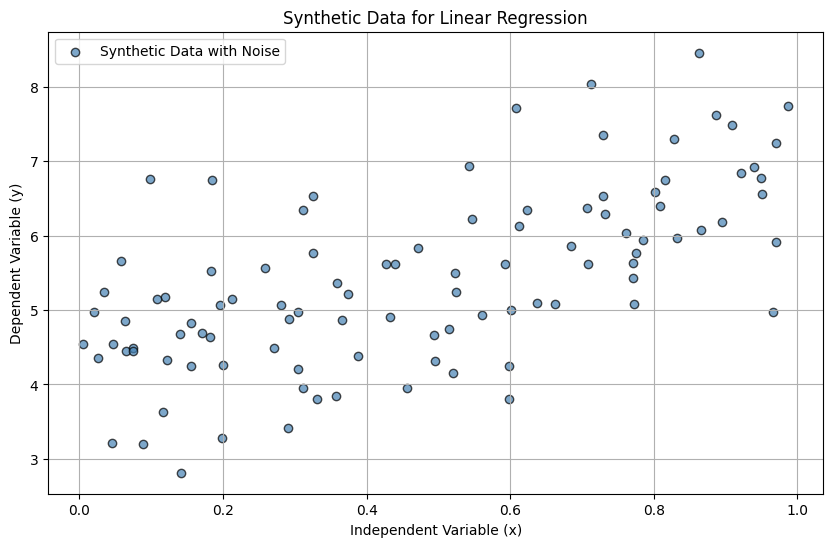

In [2]:
# Generate the data using our refactored function
x, y = generate_data()

# Display the first 5 rows of each vector
print("First 5 elements of x:\n", x[:5])
print("First 5 elements of y:\n", y[:5])

# Plot the generated data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='steelblue', alpha=0.7, edgecolors='k', label='Synthetic Data with Noise')
plt.title("Synthetic Data for Linear Regression")
plt.xlabel("Independent Variable (x)")
plt.ylabel("Dependent Variable (y)")
plt.legend()
plt.grid(True)
plt.show()

## 3. Model Implementation: The Normal Equation

To implement the linear regression model using matrix algebra, we first need to construct a **Design Matrix (X)**. This matrix includes:

- A column of ones: This represents the **intercept** term ($\beta_0$).
- A column with the values of our independent variable $x$: This represents the coefficient for that feature ($\beta_1$).

$$
X =
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix}
\in \mathbb{R}^{n \times 2}
$$

This allows us to express the linear model as a matrix multiplication:

$$
y = X \cdot \beta + \varepsilon
$$

Where:
- $y$ is the vector of observed values.
- $\beta$ is the vector of parameters $[\beta_0, \beta_1]^T$.
- $\varepsilon$ is the error term (random noise).

The goal is to find the vector of parameters $\boldsymbol{\beta}$ that best fits a line to the data by minimizing the squared error between the predictions and the actual observed values.

Using matrix algebra, the optimal solution for $\boldsymbol{\beta}$ is found with the **Normal Equation**:

$$
\boldsymbol{\beta} = (X^T X)^{-1} X^T y
$$

Where:
- $X^T$ is the transpose of the design matrix $X$.
- $(X^T X)^{-1}$ is the inverse of the matrix product $X^T X$.
- $y$ is the vector of observed values.

This formula gives us a $\boldsymbol{\beta}$ vector containing:
- $\beta_0$: The intercept.
- $\beta_1$: The slope, or the coefficient for the independent variable.

Our `fit_linear_regression` function in `src/linear_regression.py` handles this entire calculation.


In [3]:
# Fit the model to our data
beta = fit_linear_regression(x, y)

# Print the calculated coefficients
print(f"Calculated Beta (Coefficients):\n{beta}")

Calculated Beta (Coefficients):
[[4.21509616]
 [2.54022677]]


The output shows our calculated coefficients:
- The **intercept** ($\beta_0$) is approximately 4.22.
- The **slope** ($\beta_1$) is approximately 2.54.

Recall that we generated our data using the formula `y = 4 + 3 * x + noise`. Our model's calculated coefficients are close to the true values of 4 and 3, which is a great sign! The difference is due to the random noise we added to the data.


## 4. Visualizing the Results

Finally, let's visualize how well our model fits the data by plotting the regression line $y = \beta_{0} + \beta_{1}x$ over the original data points.


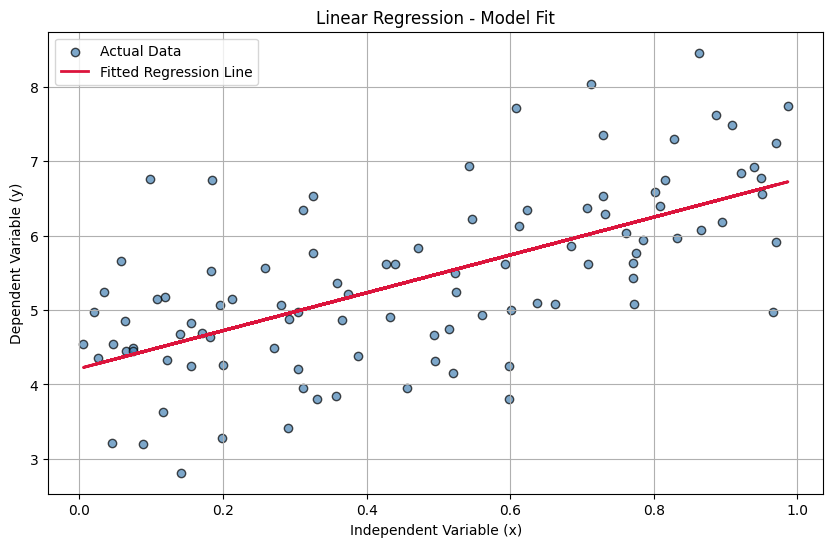

In [4]:
# Plot the results using our refactored function
plot_regression_results(x, y, beta)

The plot clearly shows that our calculated line is a very good fit for the underlying data.


## 5. Comparison with scikit-learn

To verify our implementation, let's compare our results with the industry-standard `scikit-learn` library. This is a crucial step to ensure our from-scratch model is mathematically correct.


In [5]:
# Import the LinearRegression model
from sklearn.linear_model import LinearRegression

# Create an instance of the model
sklearn_model = LinearRegression()

# Fit the model to the data
sklearn_model.fit(x, y)

# Get the coefficients
sklearn_intercept = sklearn_model.intercept_[0]
sklearn_slope = sklearn_model.coef_[0][0]

# Print the comparison
print("--- Coefficient Comparison ---")
print(f"Our model's intercept: {beta[0][0]:.4f}")
print(f"Scikit-learn's intercept: {sklearn_intercept:.4f}\n")

print(f"Our model's slope: {beta[1][0]:.4f}")
print(f"Scikit-learn's slope: {sklearn_slope:.4f}")

--- Coefficient Comparison ---
Our model's intercept: 4.2151
Scikit-learn's intercept: 4.2151

Our model's slope: 2.5402
Scikit-learn's slope: 2.5402


As we can see, the coefficients calculated by our from-scratch model are virtually identical to those calculated by `scikit-learn`. This confirms that our implementation of the normal equation is correct.


## 6. Conclusion

In this project, we successfully built a simple linear regression model from scratch using only NumPy for matrix operations. By refactoring the code into a modular structure and comparing our results against `scikit-learn`, we've created a clean, understandable, and verifiable machine learning project.
